# NLP Recommender System for Trip Advisor: Data Analysis and System Creation
Using the scraped data from Trip Advisor, we're now in the process of developing a highly personalized Natural Language Processing (NLP) Recommender System. This system aims to offer travel recommendations tailored to the unique preferences of individual users.

Our approach involves employing advanced NLP techniques, including TD-IDF Vectorization, Count Vectorization, Cosine Similarity, Bi-Grams, Ensemble learning, and BERT. These methods allow the system to extract meaningful patterns, relationships, and context from the wealth of textual data, ensuring a nuanced understanding of user preferences.

As users interact with the recommender system, it dynamically adapts and learns from their choices, continuously refining its recommendations. The goal is to provide a personalized travel experience, capturing the diverse spectrum of travel desires, whether it's the tranquility of a secluded retreat or the vibrancy of a bustling city.

This project represents a step toward creating an intelligent platform that tailors travel suggestions based on insights from Trip Advisor data. The vision is to enhance the travel experience by offering recommendations aligned with users' unique tastes and preferences, contributing to a more personalized approach to travel guidance.

## Table of Contents
---
- [Reading Data](#Reading-Data)
- [Data Cleaning](#Data-Cleaning)
- [Data Visualization](#Data-Visualization)
  - [Word Clouds](#Word-Clouds)
  - [Most Frequent Words](#Most-Frequent-Words)
- [Model Preparation](#Model-Preparation)
  - [Establishing a Baseline](#Establishing-a-Baseline)
- [Modeling Vectorization Methods](#Modeling-Vectorization-Methods)
  - [TF-IDF Vectorization](#TF-IDF-Vectorization)
  - [Count Vectorization](#Count-Vectorization)
  - [Unigrams and Bi-Grams](#Unigrams-and-Bi-Grams)
  - [Model Comparison](#Model-Comparison)
- [Preliminary NLP Recommender Systems](#Preliminary-NLP-Recommender-Systems)
  - [Cosine Similarity using TD-IDF Vectorization](#Cosine-Similarity-using-TD-IDF-Vectorization)
  - [Cosine Similarity using Count Vectorization](#Cosine-Similarity-using-Count-Vectorization)
  - [Our Preliminary Model](#Our-Preliminary-Model)
- [Algorithm Comparison](#Preliminary-NLP-Recommender-Systems)
- [BERT](#BERT)
- [Discussion and Recommendations](#Discussion-and-Recommendations)

## Reading Data

We first import the necessary libraries for data cleaning, modeling, and visualization.

In [1]:
!pip install nltk
!pip download spacy
!pip install prettytable
!pip install tensorflow-text

  Using cached spacy-3.7.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.9/156.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.3/922.3 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.0/493.0 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


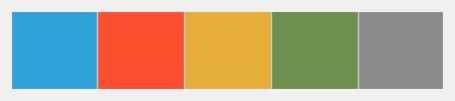

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
]
sns.set_palette(five_thirty_eight)
sns.palplot(sns.color_palette())
import plotly.graph_objects as go
import plotly.express as px
from prettytable import PrettyTable

import re
import string
import datetime
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Download stopwords from nltk
nltk.download('stopwords')

# Download the punkt tokenizer
nltk.download('punkt')

# Download the WordNet resource
nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.naive_bayes import MultinomialNB, ComplementNB, GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.utils import compute_sample_weight
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.pipeline import Pipeline

# For Algorithm Comparison
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import xgboost as xgb

# For word clouds
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# For BERT
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras
import tensorflow_text
import sklearn.metrics as metrics

# For Neural Network
from keras import layers, models, optimizers, losses, metrics
from keras.callbacks import Callback, EarlyStopping

We then summarize what we found from scraping Trip Advisor.

In [3]:
travel_df = pd.read_csv('all_things_to_do.csv')
print('There are {} rows and {} columns in our dataset.'.format(travel_df.shape[0],travel_df.shape[1]))

There are 56109 rows and 2 columns in our dataset.


In [4]:
travel_df.sample(10)

Text                    Location
48309                               Havet              Norway, Europe
43628                    SA.CHOOM Theater      South Korea, East Asia
34800                          RocketBoat  San Franscisco, California
41577  Charlie Chan's Bar and Bottle Shop          Sydney, Austrailia
6376                 Yu. Nikulin's Museum              Moscow, Russia
37809   Remarkable Sweet Shop - Arrowtown  New Zealand, Pacific Ocean
264                         Cihelná brána      Prague, Czech Republic
40360                 Baliba Pub and Cafe             Singapore, Asia
42199              Hallasan National Park      South Korea, East Asia
34956                         Hiking Yoga  San Franscisco, California

In [5]:
travel_df.describe()

Text      Location
count             56109         56109
unique            52745            30
top     Statue of Peace  Tokyo, Japan
freq                 68          3180

We are can that there are `52,745` unique things to do at `30` locations. We will now clean our travel dataset.

## Data Cleaning
Let's first check for null values.

In [6]:
travel_df.isna().sum()

Text        0
Location    0
dtype: int64

There aren't any null values (as we scrapped valid destinations from Trip Advisor). However, we can see that there are a fair amount of locations with duplicated text. We will remove these.

In [7]:
travel_df = travel_df.drop_duplicates()

We then plot the associated locations to see how many things to do we found at individual locations.

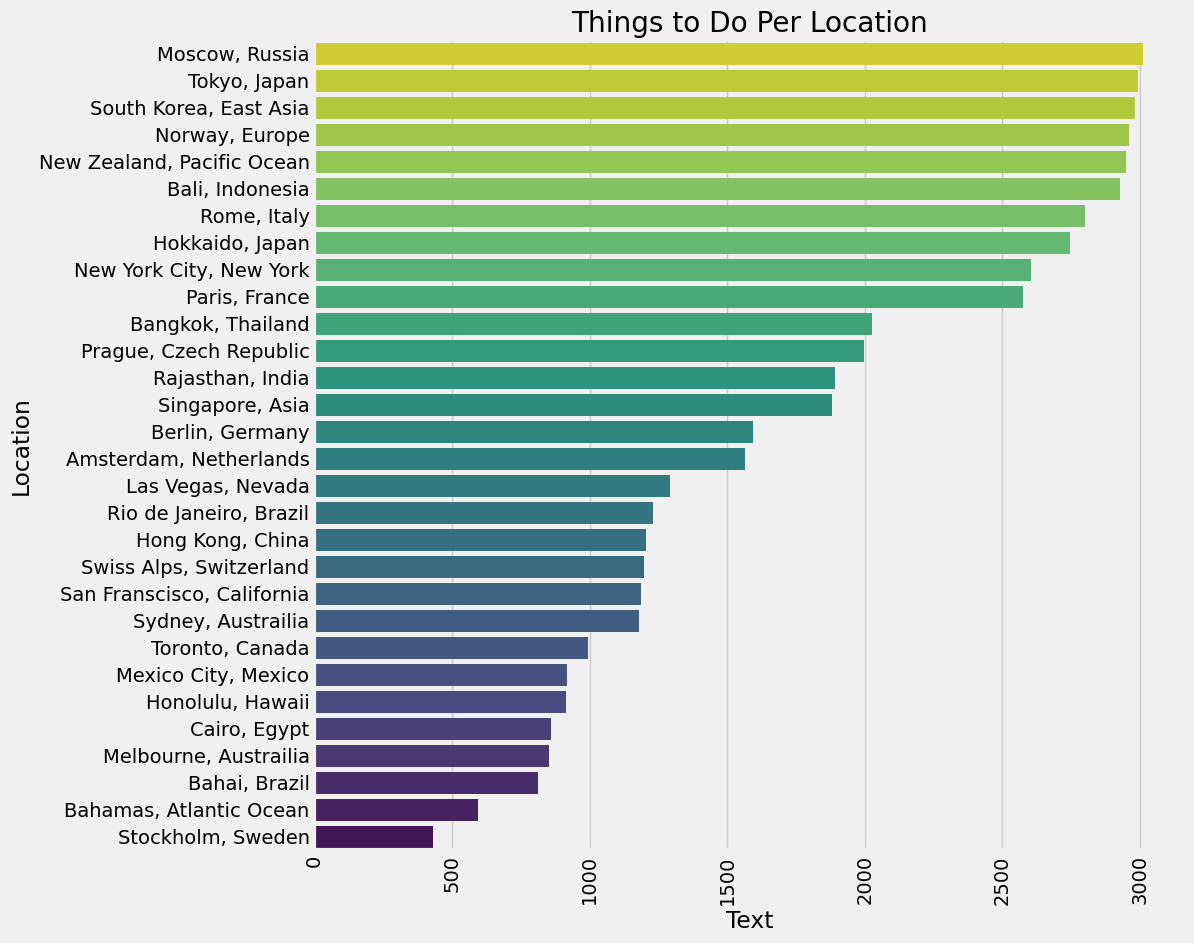

In [8]:
def plot_things_to_do_per_location(travel_df):
    """
    Plot the number of things to do per location using a bar chart.

    Parameters:
    - travel_df (pd.DataFrame): DataFrame containing the travel data.

    Returns:
    None
    """
    # Group by 'Location' and count occurrences
    locations = travel_df.groupby('Location').count()

    # Create a bar plot
    plt.figure(figsize=(10, 10))

    # Sort the locations by the number of text in descending order
    sorted_cities = locations.sort_values(by='Text', ascending=False)

    # Automatically generate a color palette based on the number of unique locations
    num_locations = len(sorted_cities)
    palette = sns.color_palette('viridis', num_locations)

    # Use seaborn barplot with the automatically generated color palette
    sns.barplot(x='Text', y='Location', data=sorted_cities, palette=palette, hue='Text', dodge=False, legend=False)

    # Set plot title and customize axis labels
    plt.title('Attractions Per Location')
    plt.xlabel('Number of Attractions')
    plt.xticks(rotation=90)

    # Display the plot
    plt.show()


plot_things_to_do_per_location(travel_df)


Next, we will clean the text in things to do for downstream processing.

In [9]:
def clean_text_column(df, column_name):
    """
    Clean the specified text column in the DataFrame using NLTK for tokenization,
    stopword removal, lemmatization, and punctuation removal.

    Parameters:
    - df (pd.DataFrame): DataFrame containing the text column.
    - column_name (str): Name of the text column to be cleaned.

    Returns:
    None
    """
    # Ensure the specified column exists in the DataFrame
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return

    # Define NLTK objects for stop words and lemmatization
    stop_words_ = set(stopwords.words('english'))
    wn = WordNetLemmatizer()

    def black_txt(token):
        # Check if the token is not a stop word, not a punctuation, and has a length greater than 2
        return token not in stop_words_ and token not in list(string.punctuation) and len(token) > 2

    def clean_txt(text):
        # Remove apostrophes, digits, non-word characters, and replace 'nbsp'
        text = re.sub("'", "", text)
        text = re.sub("(\\d|\\W)+", " ", text)
        text = text.replace("nbsp", "")

        # Tokenize, lemmatize, and filter based on defined conditions
        clean_text = [wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]

        return " ".join(clean_text)

    # Apply the cleaning function to the specified column
    df[column_name] = df[column_name].apply(clean_txt)

# Apply the clean text function to the "Things to Do"
clean_text_column(travel_df, 'Text')

We now investigate visualizing our travel data.

## Data Visualization
Since our travel locations have thousands of words, let's make word clouds to display common text associated with travel.

### Word Clouds
Below, we create a function for generating word clouds from the raw text scraped by all the travel destinations.

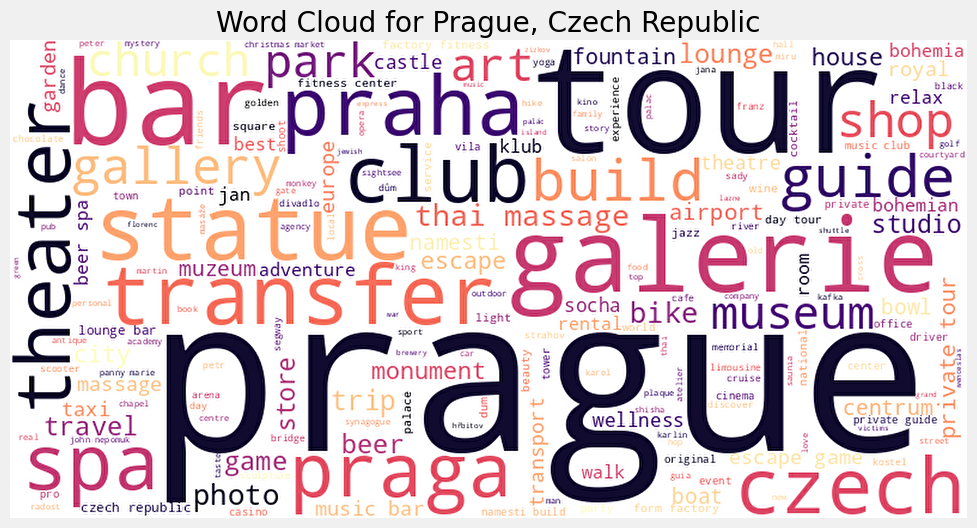

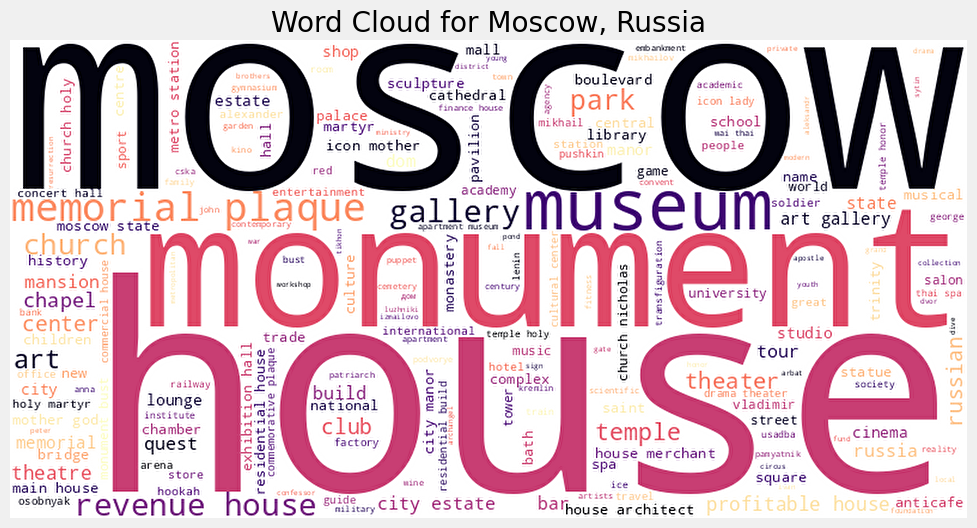

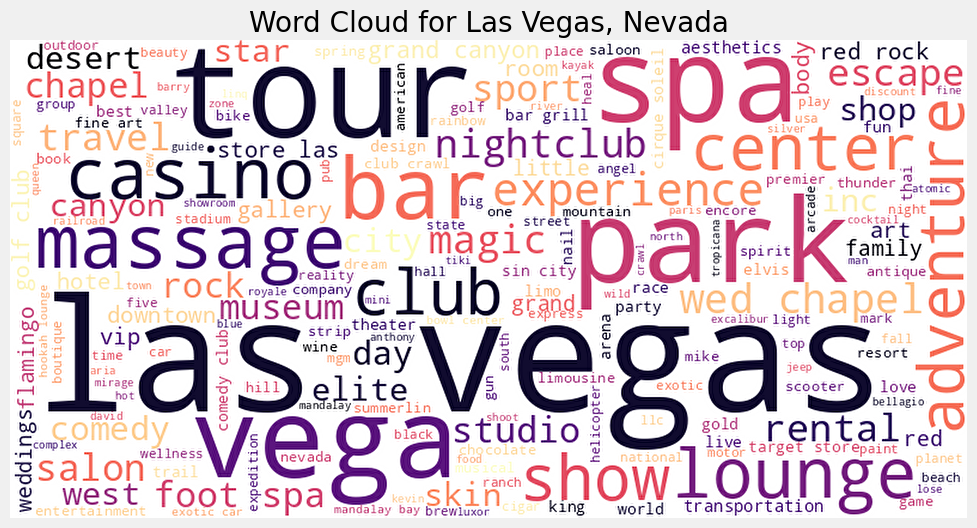

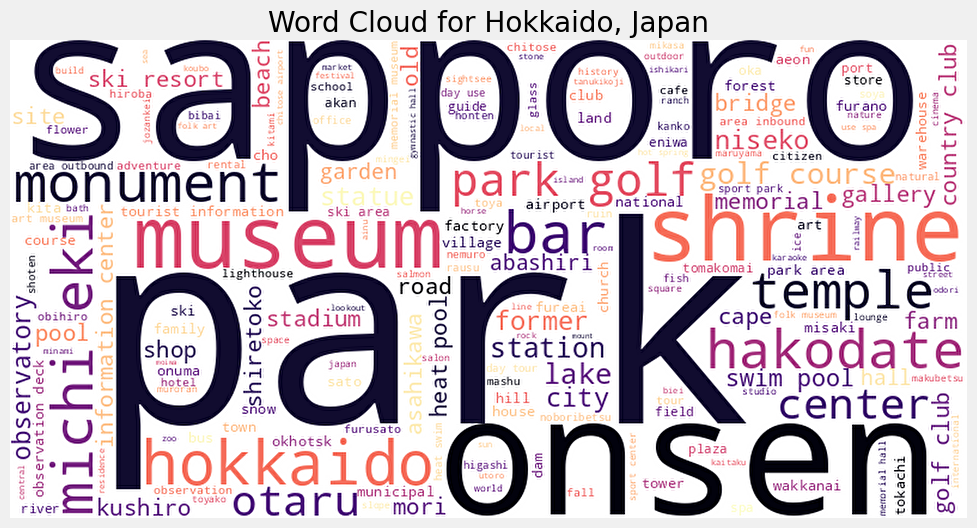

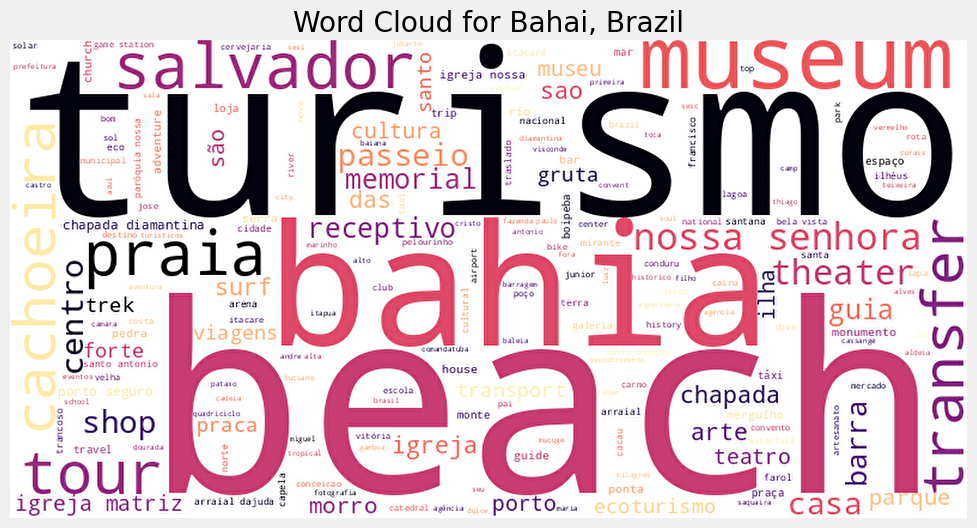

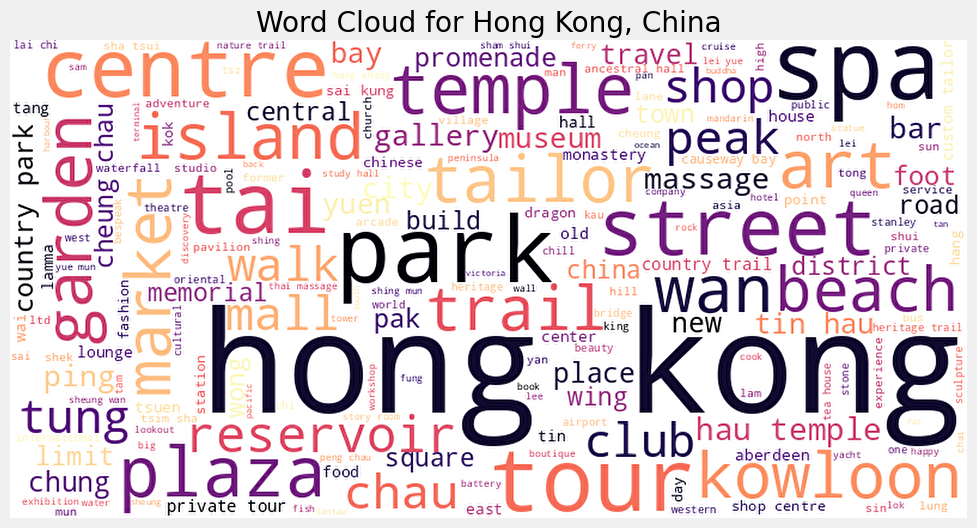

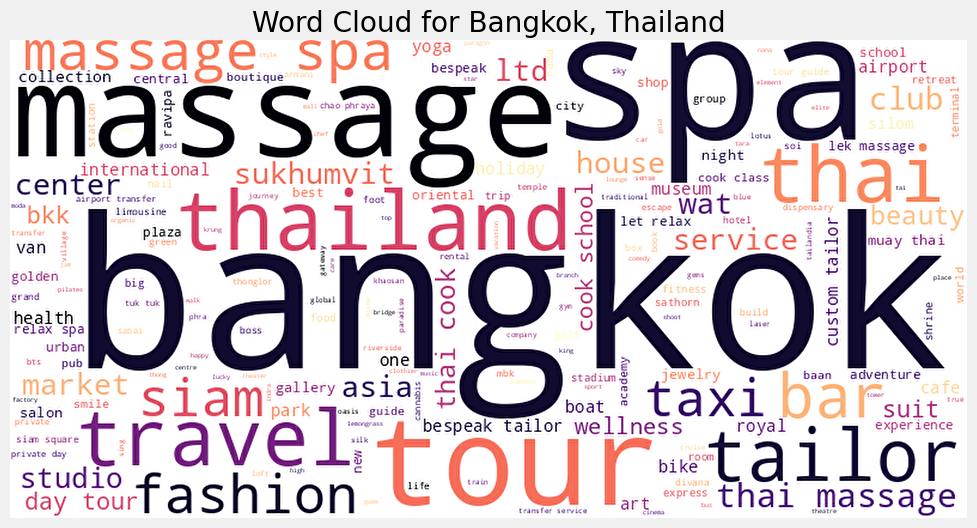

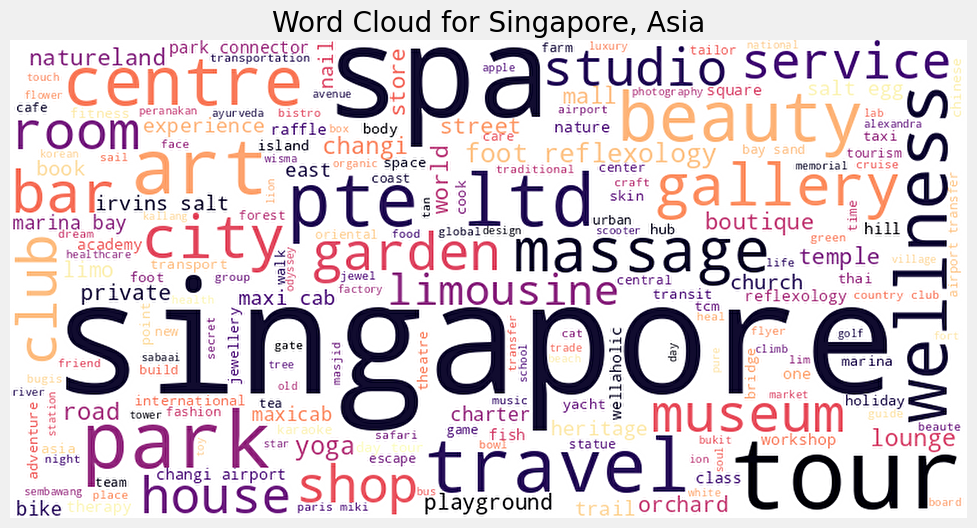

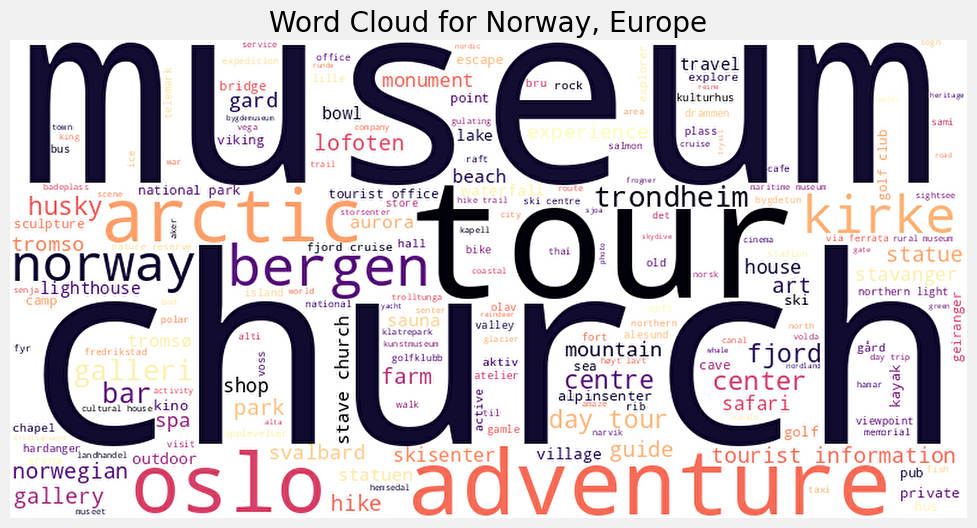

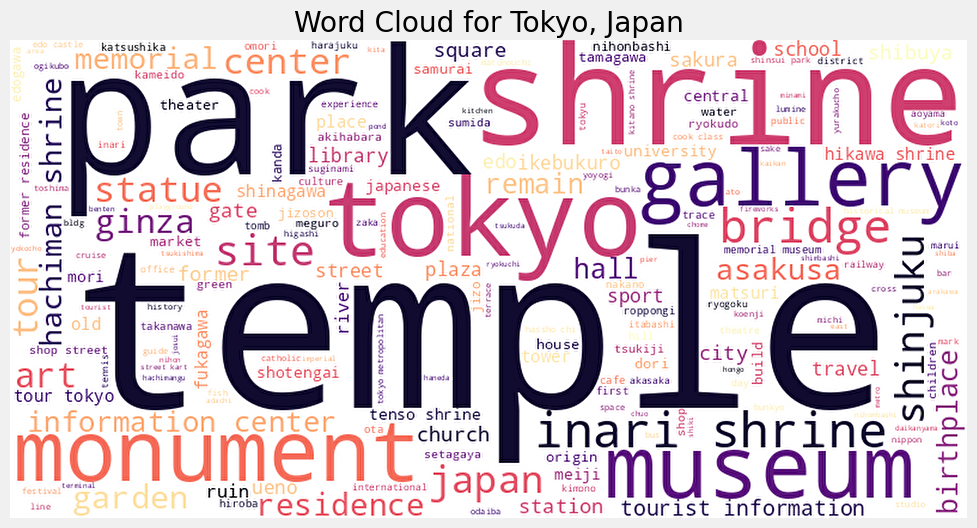

In [10]:
def generate_wordcloud(data, location):
    """
    Generate and display a word cloud for a specific location in the given data.

    Parameters:
    - data (pd.DataFrame): DataFrame containing the travel data.
    - location (str): Name of the location for which to generate the word cloud.

    Returns:
    None
    """
    # Extract text data for the specified location
    location_text = " ".join(text for text in data[data['Location'] == location]['Text'])

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap="magma", random_state=42).generate(location_text)

    # Plot the word cloud
    plt.figure(figsize=[11, 11])
    plt.title(f"Word Cloud for {location}")
    plt.imshow(wordcloud, interpolation="sinc")
    plt.axis("off")
    plt.show()
    plt.close()

# Loop through unique locations in the 'Location' column of travel_df with a step of 3
for i in range(0, len(travel_df['Location'].unique()), 3):
    # Get the current location
    location = travel_df['Location'].unique()[i]

    # Call generate_wordcloud function for the current location
    generate_wordcloud(travel_df, location)

    # Print two empty lines
    print("\n\n")

### Most Frequent Words
Next, we analyze the most frequent words in things to do across all locations scraped from Trip Advisor.

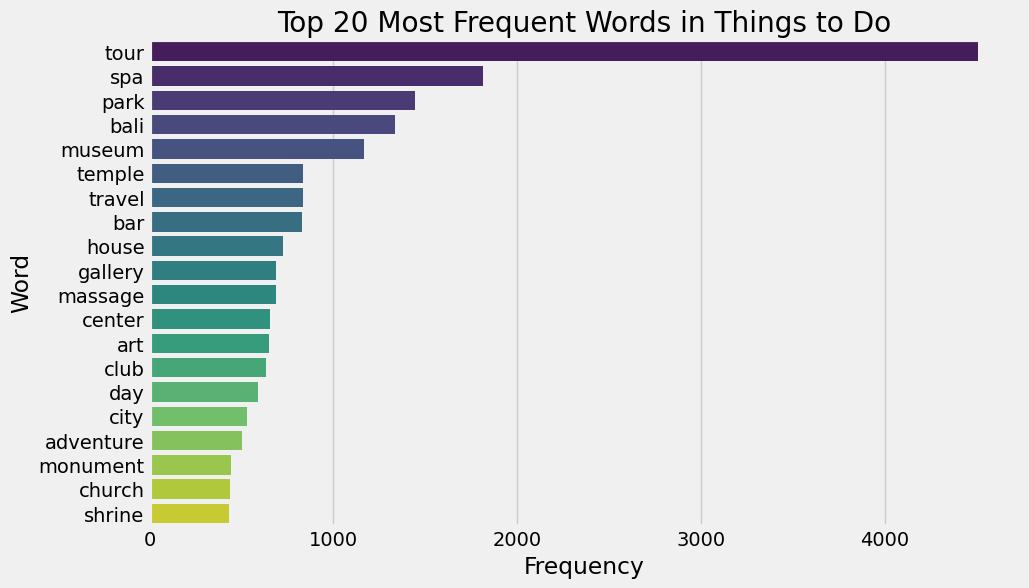

In [11]:
def plot_most_frequent_words(dataframe, column_name, num_words=10):
    """
    Find the most frequent words in a text column of a DataFrame and plot them in a Seaborn barplot.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame containing the text column.
    - column_name (str): The name of the text column.
    - num_words (int): Number of most frequent words to display. Default is 10.

    Returns:
    None
    """
    # Combine all text in the specified column
    all_text = ' '.join(dataframe[column_name].dropna().astype(str))

    # Tokenize the text
    tokens = word_tokenize(all_text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

    # Calculate frequency distribution
    freq_dist = FreqDist(tokens)

    # Get the top N most frequent words and their frequencies
    top_words, frequencies = zip(*freq_dist.most_common(num_words))

    # Create a DataFrame for plotting
    plot_data = pd.DataFrame({'Word': top_words, 'Frequency': frequencies})

    # Plot using Seaborn barplot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Word', data=plot_data, palette='viridis', hue='Word', dodge=False, legend=False)
    plt.title(f"Top {num_words} Most Frequent Words in Things to Do")
    plt.xlabel("Frequency")
    plt.ylabel("Word")
    plt.show()


plot_most_frequent_words(travel_df, 'Text', num_words=20)

We can see that `tour`, `spa`, `park`, `bali`, and `museum` are the five most frequent words. This makes sense as these five words are common activities associated with travel.

## Model Preparation

Before we start model preparation, we will first establish a baseline.

### Establing a baseline

In our case, the baseline will be a [Naive Bayes estimator](https://towardsdatascience.com/all-about-naive-bayes-8e13cef044cf) which is a recommended estimator for text classification problems with large datasets. We first split up our dataset into Train and Test.

In [12]:
X = travel_df['Text']
y = travel_df['Location']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)
X_train.shape, X_test.shape

((39873,), (13291,))

We then create several helper functions to summarize statistical information about our models.

In [13]:
def compute_sample_weights(y):
    """
    Compute sample weights based on class weights for handling class imbalance.

    Parameters:
    - y (array-like): Target labels.

    Returns:
    - array-like: Sample weights.
    """
    class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
    sample_weights = compute_sample_weight(class_weight={cls: weight for cls, weight in zip(np.unique(y), class_weights)}, y=y)
    return sample_weights

def evaluate_model(model, X, y, label='Training'):
    """
    Evaluate a model on given data and print accuracy, precision, recall, F1-score, and classification report.

    Parameters:
    - model: Trained model.
    - X (array-like): Data.
    - y (array-like): Target labels.
    - label (str): Label for printing.

    Returns:
    None
    """
    y_preds = model.predict(X)
    print(f'------------- {label} Statistics -------------')
    print(f'{label} Accuracy: {accuracy_score(y, y_preds)}')
    print(f'{label} Precision: {precision_score(y, y_preds, average="weighted")}')
    print(f'{label} Recall: {recall_score(y, y_preds, average="weighted")}')
    print(f'{label} F1: {f1_score(y, y_preds, average="weighted")}')
    print()

In [14]:
def train_and_evaluate_multinomial_model(X_train, y_train, X_test, y_test, vectorizer):
    """
    Train and evaluate a Complement Naive Bayes model on the training and testing data.

    Parameters:
    - X_train (array-like): Training text data.
    - y_train (array-like): Training labels.
    - X_test (array-like): Testing text data.
    - y_test (array-like): Testing labels.
    - vectorizer: Text vectorizer.

    Returns:
    None
    """
    X_train_baseline = vectorizer.fit_transform(X_train)
    X_test_baseline = vectorizer.transform(X_test)

    sample_weights_train = compute_sample_weights(y_train)
    sample_weights_test = compute_sample_weights(y_test)

    model = MultinomialNB()
    model.fit(X_train_baseline, y_train, sample_weights_train)

    evaluate_model(model, X_train_baseline, y_train, label='Training')
    evaluate_model(model, X_test_baseline, y_test, label='Test')

We then test our Naive Bayes Multinomial model.

In [15]:
vectorizer = TfidfVectorizer(analyzer='word', decode_error='ignore')
train_and_evaluate_multinomial_model(X_train, y_train, X_test, y_test, vectorizer)

------------- Training Statistics -------------
Training Accuracy: 0.7792741955709377
Training Precision: 0.8055163152916796
Training Recall: 0.7792741955709377
Training F1: 0.7835970511834606

------------- Test Statistics -------------
Test Accuracy: 0.48009931532616057
Test Precision: 0.5562963927081624
Test Recall: 0.48009931532616057
Test F1: 0.4941736109514164



We can improve our baseline model by recognizing that we have class imbalances (due to scraping more text from specific locations in Trip Advisor). Instead of using [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html), we can apply [Complement Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB). Complement Naive Bayes is an adaptation of Multinomial Naive Bayes where the complement of each class is used to calculate the model weights. So, it is suitable for imbalanced data sets and often outperforms the Multinomial Naive Bayes on text classification tasks.

In [16]:
def train_and_evaluate_complement_multinomial_model(X_train, y_train, X_test, y_test, vectorizer):
    """
    Train and evaluate a Complement Naive Bayes model on the training and testing data.

    Parameters:
    - X_train (array-like): Training text data.
    - y_train (array-like): Training labels.
    - X_test (array-like): Testing text data.
    - y_test (array-like): Testing labels.
    - vectorizer: Text vectorizer.

    Returns:
    None
    """
    X_train_baseline = vectorizer.fit_transform(X_train)
    X_test_baseline = vectorizer.transform(X_test)

    model = ComplementNB()
    model.fit(X_train_baseline, y_train)

    evaluate_model(model, X_train_baseline, y_train, label='Training')
    evaluate_model(model, X_test_baseline, y_test, label='Test')

Let's test our improved model with the Complement Naive Bayes.

In [17]:
vectorizer = TfidfVectorizer(analyzer='word', decode_error='ignore')
train_and_evaluate_complement_multinomial_model(X_train, y_train, X_test, y_test, vectorizer)

------------- Training Statistics -------------
Training Accuracy: 0.8703132445514509
Training Precision: 0.8723160691357223
Training Recall: 0.8703132445514509
Training F1: 0.8695983622251657

------------- Test Statistics -------------
Test Accuracy: 0.5119253630276127
Test Precision: 0.5541536160043723
Test Recall: 0.5119253630276127
Test F1: 0.5179273194760169



We see that we get reasonable performance results with the Complement Naive Bayes algorithm. Can we get better performance results with a different algorithm?

## Modeling Vectorization Methods

### Count Vectorization

As a first comparison, we will analyze performance results using Count Vectorization instead of TD-IDF Vectorization.

In [18]:
vectorizer = CountVectorizer(analyzer='word', decode_error='ignore')
train_and_evaluate_complement_multinomial_model(X_train, y_train, X_test, y_test, vectorizer)

------------- Training Statistics -------------
Training Accuracy: 0.851854638477165
Training Precision: 0.854283563482534
Training Recall: 0.851854638477165
Training F1: 0.8509377332188205

------------- Test Statistics -------------
Test Accuracy: 0.5125272740952524
Test Precision: 0.5572557367391023
Test Recall: 0.5125272740952524
Test F1: 0.5179923807293196



The performance results are slightly lower than TD-IDF vectorization. Next, we will try Unigrams and Bi-Grams aginst TD-IDF vectorization and Count Vectorization.

### Unigrams and Bi-Grams

Unigrams and Bi-Grams with TD-IDF Vectorization.

In [19]:
vectorizer = TfidfVectorizer(analyzer='word', decode_error='ignore', ngram_range=(1,2))
train_and_evaluate_complement_multinomial_model(X_train, y_train, X_test, y_test, vectorizer)

------------- Training Statistics -------------
Training Accuracy: 0.9626313545506985
Training Precision: 0.9629586947983386
Training Recall: 0.9626313545506985
Training F1: 0.9626191538224839

------------- Test Statistics -------------
Test Accuracy: 0.5203521179745693
Test Precision: 0.5633712234518169
Test Recall: 0.5203521179745693
Test F1: 0.5278212485403018



Unigrams and Bi-Grams with Count Vectorization.

In [20]:
vectorizer = CountVectorizer(analyzer='word', decode_error='ignore', ngram_range=(1,2))
train_and_evaluate_complement_multinomial_model(X_train, y_train, X_test, y_test, vectorizer)

------------- Training Statistics -------------
Training Accuracy: 0.9519474331000928
Training Precision: 0.9522497475077971
Training Recall: 0.9519474331000928
Training F1: 0.9518948609685237

------------- Test Statistics -------------
Test Accuracy: 0.520954029042209
Test Precision: 0.5660549535093631
Test Recall: 0.520954029042209
Test F1: 0.5281321538948689



We see positive results with setting `ngram_range=(1,2)`, which is both unigrams and bi-grams.

### Model Comparison

We now combine all of our results into a table for comparison.

In [21]:
def evaluate_model_metrics(model, X, y, label='Training'):
    """
    Evaluate a model on given data and return accuracy, precision, recall, and F1-score.

    Parameters:
    - model: Trained model.
    - X (array-like): Data.
    - y (array-like): Target labels.
    - label (str): Label for printing.

    Returns:
    dict: Dictionary containing evaluation metrics.
    """
    y_preds = model.predict(X)
    metrics = {
        'Accuracy': accuracy_score(y, y_preds),
        'Precision': precision_score(y, y_preds, average='weighted'),
        'Recall': recall_score(y, y_preds, average='weighted'),
        'F1': f1_score(y, y_preds, average='weighted')
    }
    return metrics

def train_and_evaluate_complement_multinomial_table(X_train, y_train, X_test, y_test, vectorizer):
    """
    Train and evaluate a Complement Naive Bayes model on the training and testing data.

    Parameters:
    - X_train (array-like): Training text data.
    - y_train (array-like): Training labels.
    - X_test (array-like): Testing text data.
    - y_test (array-like): Testing labels.
    - vectorizer: Text vectorizer.

    Returns:
    PrettyTable: Table containing evaluation results.
    """
    X_train_baseline = vectorizer.fit_transform(X_train)
    X_test_baseline = vectorizer.transform(X_test)

    model = ComplementNB()
    model.fit(X_train_baseline, y_train)

    train_results = evaluate_model_metrics(model, X_train_baseline, y_train, label='Training')
    test_results = evaluate_model_metrics(model, X_test_baseline, y_test, label='Test')

    # Create a PrettyTable
    table = PrettyTable()
    table.field_names = ["Metric", "Training", "Test"]

    # Add rows to the table
    metrics = ["Accuracy", "Precision", "Recall", "F1"]
    for metric in metrics:
        table.add_row([
            metric,
            f"{train_results[metric]:.2%}",
            f"{test_results[metric]:.2%}"
        ])

    return table

# Example usage:
vectorizer1 = TfidfVectorizer(analyzer='word', decode_error='ignore')
result1 = train_and_evaluate_complement_multinomial_table(X_train, y_train, X_test, y_test, vectorizer1)

vectorizer2 = CountVectorizer(analyzer='word', decode_error='ignore')
result2 = train_and_evaluate_complement_multinomial_table(X_train, y_train, X_test, y_test, vectorizer2)

vectorizer3 = TfidfVectorizer(analyzer='word', decode_error='ignore', ngram_range=(1,2))
result3 = train_and_evaluate_complement_multinomial_table(X_train, y_train, X_test, y_test, vectorizer3)

vectorizer4 = CountVectorizer(analyzer='word', decode_error='ignore', ngram_range=(1,2))
result4 = train_and_evaluate_complement_multinomial_table(X_train, y_train, X_test, y_test, vectorizer4)

# Print the tables
print("Vectorizer 1 (TfidfVectorizer):")
print(result1)

print("\nVectorizer 2 (CountVectorizer):")
print(result2)

print("\nVectorizer 3 (TfidfVectorizer, ngram_range=(1,2)):")
print(result3)

print("\nVectorizer 4 (CountVectorizer, ngram_range=(1,2)):")
print(result4)


Vectorizer 1 (TfidfVectorizer):
+-----------+----------+--------+
|   Metric  | Training |  Test  |
+-----------+----------+--------+
|  Accuracy |  87.03%  | 51.19% |
| Precision |  87.23%  | 55.42% |
|   Recall  |  87.03%  | 51.19% |
|     F1    |  86.96%  | 51.79% |
+-----------+----------+--------+

Vectorizer 2 (CountVectorizer):
+-----------+----------+--------+
|   Metric  | Training |  Test  |
+-----------+----------+--------+
|  Accuracy |  85.19%  | 51.25% |
| Precision |  85.43%  | 55.73% |
|   Recall  |  85.19%  | 51.25% |
|     F1    |  85.09%  | 51.80% |
+-----------+----------+--------+

Vectorizer 3 (TfidfVectorizer, ngram_range=(1,2)):
+-----------+----------+--------+
|   Metric  | Training |  Test  |
+-----------+----------+--------+
|  Accuracy |  96.26%  | 52.04% |
| Precision |  96.30%  | 56.34% |
|   Recall  |  96.26%  | 52.04% |
|     F1    |  96.26%  | 52.78% |
+-----------+----------+--------+

Vectorizer 4 (CountVectorizer, ngram_range=(1,2)):
+-----------+--

Our third vectorization method (TD-IDF with unigrams and bi-grams) has the best performance. We see that this technique gives slightly better performance metrics than TD-IDF vectorizaion with the Complement Naive Bayes algorithm.

## Preliminary NLP Recommender Systems
We now test multiple NLP recommender systems, such as Cosine Similarity with TD-IDF, Cosine Similarity with Count Vectorization, K-Nearest Neighbors, Logistic Regression, Support Vector Machine, Decision Tree, and Ensemble Learning. This allows us to evaluate their effectiveness in providing accurate and personalized travel recommendations.

### Cosine Similarity using TD-IDF

In [22]:
text_to_predict = "I want to eat a lot of chocolate and pizza."
vectorizer = TfidfVectorizer(analyzer='word', decode_error='ignore')
X_train_baseline = vectorizer.fit_transform(X_train)
travel_tfidf = vectorizer.transform([text_to_predict])

cos_similarity_tfidf = [cosine_similarity(travel_tfidf, x) for x in X_train_baseline]
cos_similarity_tfidf_list = list(cos_similarity_tfidf)


Create a function to find the top $N$ recommendations by score.

In [23]:
def get_recommendation(text_to_predict, df_all, scores, top_k=10):
    """
    Generate recommendation DataFrame based on top scores, DataFrame, and text.

    Parameters:
    - text_to_predict (str): The user's input text.
    - df_all (pd.DataFrame): DataFrame containing additional information (e.g., locations).
    - scores (list): List of similarity scores.
    - top_k (int): Number of top recommendations to retrieve (default is 10).

    Returns:
    - pd.DataFrame: DataFrame containing recommendations.
    """
    # Get top-k indices based on scores
    top_indices = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)[:top_k]

    recommendation = pd.DataFrame(columns=['Text', 'Location', 'Score'])

    for i, index in enumerate(top_indices):
        recommendation.at[i, 'Text'] = text_to_predict
        recommendation.at[i, 'Location'] = df_all['Location'].iloc[index]
        recommendation.at[i, 'Score'] = scores[index]

    return recommendation

Test the recommendation function against the travel data.

In [24]:
# Generate recommendation using the get_recommendation function
list_scores = list_scores = [cos_similarity_tfidf_list[i][0][0] for i in range(len(cos_similarity_tfidf_list))]
recommendation_df = get_recommendation(text_to_predict, travel_df, list_scores)
recommendation_df

Text                    Location  \
0  I want to eat a lot of chocolate and pizza.               Bahai, Brazil   
1  I want to eat a lot of chocolate and pizza.             Berlin, Germany   
2  I want to eat a lot of chocolate and pizza.           Bangkok, Thailand   
3  I want to eat a lot of chocolate and pizza.     New York City, New York   
4  I want to eat a lot of chocolate and pizza.       Melbourne, Austrailia   
5  I want to eat a lot of chocolate and pizza.             Bali, Indonesia   
6  I want to eat a lot of chocolate and pizza.  New Zealand, Pacific Ocean   
7  I want to eat a lot of chocolate and pizza.  New Zealand, Pacific Ocean   
8  I want to eat a lot of chocolate and pizza.  New Zealand, Pacific Ocean   
9  I want to eat a lot of chocolate and pizza.      Amsterdam, Netherlands   

      Score  
0  0.467184  
1  0.459237  
2  0.444343  
3  0.412636  
4  0.389862  
5  0.381625  
6  0.376833  
7  0.371196  
8  0.349653  
9  0.343854

## Cosine Similarity using Count Vectorizer

In [25]:
text_to_predict = "I want to eat a lot of chocolate and pizza."
vectorizer = CountVectorizer(analyzer='word', decode_error='ignore')
X_train_baseline = vectorizer.fit_transform(X_train)
travel_count_vectorizer = vectorizer.transform([text_to_predict])

cos_similarity_count_vectorizer = map(lambda x: cosine_similarity(travel_count_vectorizer, x),X_train_baseline)
cos_similarity_count_vectorizer_list = list(cos_similarity_count_vectorizer)

Test the recommendation function against a different form of vectorization.

In [26]:
# Generate recommendation using the get_recommendation function
list_scores = list_scores = [cos_similarity_count_vectorizer_list[i][0][0] for i in range(len(cos_similarity_count_vectorizer_list))]
recommendation_df = get_recommendation(text_to_predict, travel_df, list_scores)
recommendation_df

Text                 Location  \
0  I want to eat a lot of chocolate and pizza.            Bahai, Brazil   
1  I want to eat a lot of chocolate and pizza.        Bangkok, Thailand   
2  I want to eat a lot of chocolate and pizza.          Berlin, Germany   
3  I want to eat a lot of chocolate and pizza.  New York City, New York   
4  I want to eat a lot of chocolate and pizza.  New York City, New York   
5  I want to eat a lot of chocolate and pizza.            Paris, France   
6  I want to eat a lot of chocolate and pizza.    Melbourne, Austrailia   
7  I want to eat a lot of chocolate and pizza.              Rome, Italy   
8  I want to eat a lot of chocolate and pizza.        Bangkok, Thailand   
9  I want to eat a lot of chocolate and pizza.        Bangkok, Thailand   

      Score  
0       0.5  
1       0.5  
2  0.353553  
3  0.353553  
4  0.353553  
5  0.353553  
6  0.353553  
7  0.353553  
8  0.353553  
9  0.353553

Both of these have fairly bad performance with a similarity score of `0.5` or lower. Can our best model from the vectorization methods section do any better?

### Our Preliminary Model

We now build a pipeline using the TD-IDF Vectorization and both unigrams and bi-grams and measure its similarity score.

In [27]:
pipe = Pipeline(steps=[
                ('TFIDFVectorizer', TfidfVectorizer(analyzer='word',decode_error='ignore',ngram_range=(1,2))),
                ('NaiveBayes', MultinomialNB())]
                )

pipe.fit(X_train,y_train)
print("Train similarity score is {}.".format(pipe.score(X_train, y_train)))

Train similarity score is 0.7352343691219623.


Let's test several examples.

In [28]:
pipe.predict(['I want to go swimming and lay out on the beach.'])[0]

'New Zealand, Pacific Ocean'

In [29]:
pipe.predict(['I want to go skiing.'])[0]

'Norway, Europe'

In [30]:
pipe.predict(['Meet lots of people and play sports.'])[0]

'Moscow, Russia'

In [31]:
pipe.predict(['Stay inside and look at museums.'])[0]

'New York City, New York'

These predictions seem reasonable. However, it appears that we could certainly beat these performance metrics. We will now benchmark several algorithms outside of the typical vectorization and cosine similarity techniques.

## Algorithm Comprison

We first convert `X_train` and `X_test` to Dataframes for processing. We also apply the `ravel` to make `y_train` and `y_test` a 1D array and encode the target variable.

In [32]:
# Convert to pandas DataFrame
X_train_df = pd.DataFrame(X_train, columns=['Text'])
X_test_df = pd.DataFrame(X_test, columns=['Text'])

# Convert to 1D array
y_train_ar = y_train.ravel()
y_test_ar = y_test.ravel()

# Use OrdinalEncoder to encode the target variable
ordinal_encoder = OrdinalEncoder()
y_train_encoded = ordinal_encoder.fit_transform(y_train_ar.reshape(-1, 1)).reshape(-1)
y_test_encoded = ordinal_encoder.transform(y_test_ar.reshape(-1, 1)).reshape(-1)

We then create a ColumnTransformer for numerical and categorical features.

In [33]:
# Create a ColumnTransformer for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(analyzer='word',decode_error='ignore',ngram_range=(1,2)), 'Text')
    ])


Let's test several ensemble methods to investigate the performance of different classification algorithms.

In [34]:
# Three classifiers for ensemble learning
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=30, max_depth=8)
svm = LinearSVC()

classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': LinearSVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Bagging Decision Tree (Ensemble)': BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=1.0, n_estimators=10),
    'Boosting Decision Tree (Ensemble)': AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10, max_depth=4),
                                     n_estimators=10, learning_rate=0.6),
    'Random Forest (Ensemble)': RandomForestClassifier(n_estimators=30, max_depth=8),
    'Voting Classifier (Ensemble)': VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                                                                  ('rf', RandomForestClassifier(n_estimators=30, max_depth=8)),
                                                                  ('svm', LinearSVC())], voting='hard')
}

results = []
for label, clf in classifiers.items():
    start = datetime.datetime.now()
    pipeline = Pipeline([
      ('preprocessor', preprocessor),
      ('classifier', clf)
    ])
    scores = cross_val_score(pipeline, X_train_df, y_train_ar, scoring='accuracy', cv=5, n_jobs=-1)
    pipeline.fit(X_train_df, y_train_ar)
    cv_time = str(datetime.datetime.now() - start)[:-3]
    result_dict = {
        'Model': label,
        'Train Accuracy': pipeline.score(X_train_df, y_train_ar),
        'Test Accuracy': pipeline.score(X_test_df, y_test_ar),
        'Max CrossVal': scores.max(),
        'Timespan': cv_time
    }
    results.append(result_dict)
    x = list(result_dict.values())

output = pd.DataFrame(results)

In [40]:
output.sort_values(by= 'Test Accuracy',ascending=False).reset_index(drop=True)

Model  Train Accuracy  Test Accuracy  \
0             Support Vector Machine        0.981642       0.526070   
1       Voting Classifier (Ensemble)        0.858325       0.502897   
2                Logistic Regression        0.770020       0.481905   
3   Bagging Decision Tree (Ensemble)        0.852632       0.390490   
4                      Decision Tree        0.984150       0.373185   
5  Boosting Decision Tree (Ensemble)        0.217666       0.213152   
6                                KNN        0.383568       0.212550   
7           Random Forest (Ensemble)        0.201314       0.195546   

   Max CrossVal     Timespan  
0      0.526520  0:00:31.254  
1      0.496552  0:10:04.468  
2      0.490658  0:11:12.097  
3      0.401254  0:25:13.136  
4      0.375047  0:07:42.163  
5      0.215047  0:00:25.325  
6      0.203662  0:00:42.427  
7      0.224856  0:00:07.663

We can see that Support Vector Machine had the highest accuracy in Training and Test.

In [35]:
Higher_Test_Accuracy = output.sort_values(by= 'Test Accuracy',ascending= False).Model
Higher_Test_Accuracy

2               Support Vector Machine
7         Voting Classifier (Ensemble)
1                  Logistic Regression
4     Bagging Decision Tree (Ensemble)
3                        Decision Tree
5    Boosting Decision Tree (Ensemble)
0                                  KNN
6             Random Forest (Ensemble)
Name: Model, dtype: object

Also, the Random Forest (Ensemble) method took the least amount of processing time.

In [36]:
Fastest = output.sort_values(by= 'Timespan').Model
Fastest

6             Random Forest (Ensemble)
5    Boosting Decision Tree (Ensemble)
2               Support Vector Machine
0                                  KNN
3                        Decision Tree
7         Voting Classifier (Ensemble)
1                  Logistic Regression
4     Bagging Decision Tree (Ensemble)
Name: Model, dtype: object

To save time for future analysis, we  save the algorithm comparison analysis to a `.csv` file.

In [37]:
csv_name = 'algorithm_comparison.csv'
output.to_csv(csv_name, index=False)

We now investigate the performance of BERT (Bidirectional Encoder Representations from Transformers).

### BERT

Any text-based machine learning task requires processing the content and converting it into numbers so the machine can understand it. Since our task  requires the dataset's title, we will perform some data preparation such as reducing characters, deleting special characters, etc. The code below carries out the necessary preprocessing actions.

In [38]:
df_all = pd.read_csv('all_things_to_do.csv')
df_all = df_all.drop_duplicates(subset = ['Text'])
df_all = df_all[['Text', 'Location']]
df_all.columns = ['Text', 'Location']
df_all['cleaned_text'] = df_all['Text'].apply(lambda x: x.lower())
df_all['cleaned_text'] = df_all['cleaned_text'].apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ', x))


We will use pretrained BERT embeddings published on Tensorflow Hub to create word embeddings. Here, we preprocess the data by removing stop words and other things using a scaled-down version of `bert_un_cased`. Subsequently, `small_bert` pretrained embeddings are used to generate the corresponding embedding vectors for every title in our dataset. The resulting embedding will contain the output for each token in the sequence as well as the pooled output for the entire sequence/title; however, in this case, we will only be using the pooled outputs because they hold the property of lowering compute power consumption and demonstrating the model's status as an unsupervised learning model.


In [42]:
# Load the preprocessor and encoder
preprocessor = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1", trainable=True)

def get_bert_embeddings(text, preprocessor, encoder):
    """
    Get BERT embeddings for a given text using preprocessor and encoder.

    Parameters:
    - text (str): The input text for which embeddings are needed.
    - preprocessor: The preprocessor layer for BERT.
    - encoder: The encoder layer for BERT.

    Returns:
    - tf.Tensor: BERT embeddings for the input text.
    """
    text_input = tf.constant([text])
    encoder_inputs = preprocessor(text_input)
    outputs = encoder(encoder_inputs)
    return outputs['pooled_output']

# Apply the get_bert_embedding function to the 'cleaned_text' column
df_all['encodings'] = df_all['cleaned_text'].apply(lambda x: get_bert_embeddings(x, preprocessor, encoder))

We have created encodings for all the text in the dataset, as shownabove. In order to uncover similarities between our interests and the encodings of the title, we must encrypt our terms of interest. To ascertain how similar the vectors are to one another, we employed cosine similarity. As demonstrated previously, cosine similarity is the inner product of two given vectors; the higher the value, the more similar the two vectors are to each other. Let's now use our different interests to query the dataset and rank the cosine similarity scores according to their respective destination.


In [47]:
def preprocess_text(text):
    """
    Preprocesses the input text by converting to lowercase and removing non-alphanumeric characters.

    Parameters:
    - text (str): The input text to be preprocessed.

    Returns:
    - str: Preprocessed text.
    """
    text = text.lower()
    text = re.sub('[^A-Za-z0-9]+', ' ', text)
    return text


text = "I want to eat a lot of chocolate and pizza."
query_text = preprocess_text(text)
query_encoding = get_bert_embeddings(query_text, preprocessor, encoder)[0]  # Extract the 2D array

# Extract the 2D array from each entry in df_all['encodings']
df_all['similarity_score'] = df_all['encodings'].apply(lambda x: cosine_similarity([x[0]], [query_encoding])[0][0])
df_results = df_all.sort_values(by=['similarity_score'], ascending=False)

Let's examine the corresponding recommendations by the model.

In [49]:
# Create df_results without including the 'encodings' column
df_results_bert = df_all.drop(columns=['encodings']).sort_values(by=['similarity_score'], ascending=False)
df_results_bert[:10]

Text                    Location  \
9884                 Eat Like a Local         Mexico City, Mexico   
9089          Eat Like a Local Mexico         Mexico City, Mexico   
9820               Do it like a local         Mexico City, Mexico   
39350             We The People Store             Singapore, Asia   
37433                    Bike It Now!  New Zealand, Pacific Ocean   
47501  Homemade Candy In The Old Town              Norway, Europe   
21198                   The Bike Shop     Bahamas, Atlantic Ocean   
26951                The Walk Of Food      Amsterdam, Netherlands   
39322         Thirsty - The Beer Shop             Singapore, Asia   
38355           The Cabbage Tree Shop  New Zealand, Pacific Ocean   

                         cleaned_text  similarity_score  
9884                 eat like a local          0.963997  
9089          eat like a local mexico          0.958383  
9820               do it like a local          0.951247  
39350             we the people store          0.950984  
37433                    bike it now           0.949848  
47501  homemade candy in the old town          0.949065  
21198                   the bike shop          0.943834  
26951                the walk of food          0.943547  
39322           thirsty the beer shop          0.938919  
38355           the cabbage tree shop          0.938818

BERT excels in capturing semantic nuances, as evidenced by similarity scores consistently exceeding 0.95. This attests to the model's robustness in understanding and representing the inherent meanings of phrases. The high similarity scores underscore BERT's accuracy and effectiveness, making it a powerful tool for natural language processing tasks.

## Discussion and Recommendations

In the preliminary stages of our project, we embarked on a comprehensive exploration of travel-related content sourced from Trip Advisor, gathering a rich dataset comprising over 50,000 phrases from diverse and popular destinations. Our primary objective was to leverage natural language processing (NLP) techniques to enhance the accuracy and effectiveness of travel recommendations. In our pursuit of the most robust model, we undertook a rigorous testing process, comparing various methodologies and models.

One standout performer in our evaluations was BERT (Bidirectional Encoder Representations from Transformers), a contemporary state-of-the-art NLP model. BERT not only exhibited exceptional performance, achieving a remarkable similarity score exceeding 0.95, but also demonstrated the advantages of utilizing transfer learning on pretrained embeddings. Additionally, the computational efficiency of BERT was noteworthy, as the model required about 10 minutes for generating embeddings, making it a practical choice for real-world applications.

Looking forward, we propose the following enhancements:

* **Web Application in Dash:** Develop a user-friendly interface for seamless interaction with our recommendation system.
* **Explore Other LLMs:** Investigate models like GPT-3 and RoBERTa for potential advantages in our use case.
* **Deep Neural Network Testing:** Assess the performance of deep neural networks to uncover novel patterns.
* **Improve Ensemble and Traditional Models:** Enhance accuracy and similarity scores for a more robust recommendation system.
* **Mitigate Overfitting:** Implement strategies to reduce overfitting, improving model generalizability.
* **Modern Recommender Systems:** Explore [contemporary approaches]((https://towardsdatascience.com/modern-recommender-systems-a0c727609aa8)) like collaborative filtering and matrix factorization.

In summary, our initial findings with BERT have laid a strong foundation, and the proposed enhancements aim to optimize accuracy, user experience, and adaptability in delivering personalized travel recommendations.





